# Exploratory Data Analysis and Feature Selection

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the data

In [2]:
train_df=pd.read_csv("Train.csv")
train_df.columns

Index(['name', 'uri', 'genres', 'artist', 'mood', 'length', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'timeSignature'],
      dtype='object')

In [3]:
train_df=train_df.drop(columns=['name', 'uri', 'genres', 'artist','length','timeSignature'])
train_df.head()

mood  acousticness  danceability  energy  instrumentalness  liveness  \
0  calm        0.9490         0.735   0.456             0.878     0.118   
1  calm        0.3390         0.491   0.532             0.971     0.257   
2  calm        0.3210         0.621   0.347             0.944     0.319   
3  calm        0.0859         0.773   0.291             0.898     0.117   
4  calm        0.7140         0.704   0.245             0.717     0.147   

   loudness  speechiness    tempo  valence  
0   -12.937       0.0524  147.970    0.708  
1    -9.540       0.0344   65.091    0.102  
2   -15.032       0.0793   87.918    0.804  
3   -15.935       0.0781   80.006    0.601  
4   -12.954       0.2160   90.156    0.190

In [4]:
train_df.describe()

acousticness  danceability       energy  instrumentalness     liveness  \
count   1784.000000   1784.000000  1784.000000       1784.000000  1784.000000   
mean       0.426452      0.624072     0.513866          0.272661     0.167223   
std        0.339483      0.136592     0.245897          0.381370     0.129601   
min        0.000005      0.000000     0.015200          0.000000     0.023300   
25%        0.080575      0.536000     0.308000          0.000000     0.096275   
50%        0.392500      0.639000     0.477000          0.001015     0.116000   
75%        0.758000      0.722000     0.737500          0.728750     0.182000   
max        0.989000      0.965000     0.988000          0.975000     0.918000   

          loudness  speechiness        tempo      valence  
count  1784.000000  1784.000000  1784.000000  1784.000000  
mean     -9.085362     0.086287   114.885512     0.438117  
std       4.177388     0.088202    30.481814     0.244363  
min     -24.269000     0.000000     0.000000     0.000000  
25%     -11.856000     0.037400    87.038500     0.239750  
50%      -8.579000     0.052450   113.719000     0.396500  
75%      -5.751250     0.094425   135.993250     0.615250  
max      -0.814000     0.814000   239.657000     0.980000

In [5]:
train_df.shape

(1784, 10)

In [6]:
train_df.groupby('mood').count()

acousticness  danceability  energy  instrumentalness  liveness  \
mood                                                                        
calm                766           766     766               766       766   
energetic           320           320     320               320       320   
happy               346           346     346               346       346   
sad                 352           352     352               352       352   

           loudness  speechiness  tempo  valence  
mood                                              
calm            766          766    766      766  
energetic       320          320    320      320  
happy           346          346    346      346  
sad             352          352    352      352

since calm songs are much greater than the songs of other moods, we chose to drop some random number of calm songs from the dataset so that the number of songs in each mood label remain almost equal

In [7]:
# Filter the DataFrame where mood is 0
filtered_df = train_df[train_df['mood'] == 'calm']

# Randomly select 300 rows from the filtered DataFrame
random_300_rows = filtered_df.sample(n=300)

# Drop the selected rows from the original DataFrame
train_df = train_df.drop(random_300_rows.index)
train_df = train_df.reset_index(drop=True)
train_df.to_csv('final__train.csv', index=False)

In [8]:
train_df.shape

(1484, 10)

In [9]:
y=train_df['mood']
train_df=train_df.drop(['mood'], axis=1)

<Axes: >

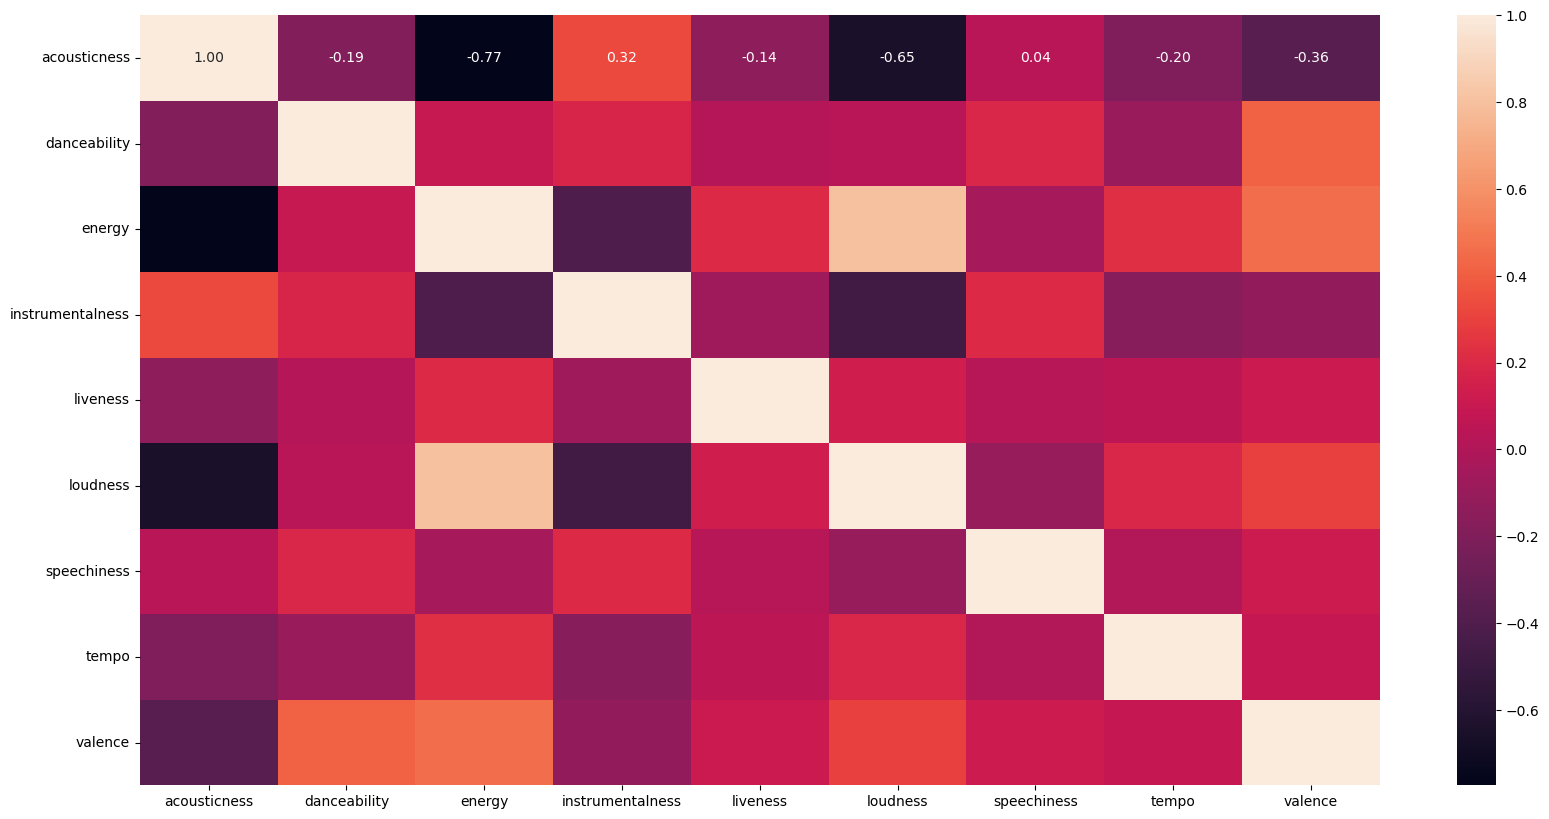

In [10]:
#Heatmap
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(train_df.corr(), annot=True, fmt='.2f')

# Frequency of songs for different values of a Feature

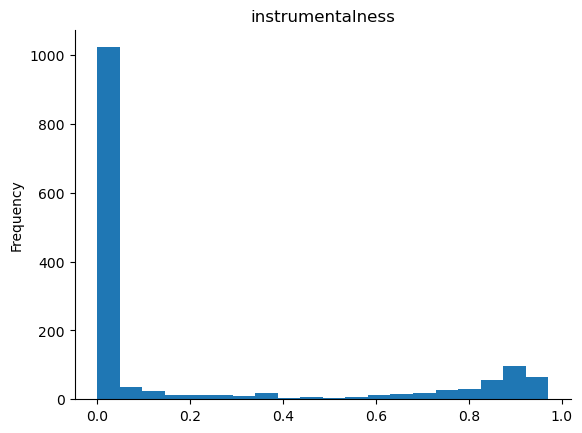

In [11]:
# instrumentalness

from matplotlib import pyplot as plt
train_df['instrumentalness'].plot(kind='hist', bins=20, title='instrumentalness')
plt.gca().spines[['top', 'right',]].set_visible(False)

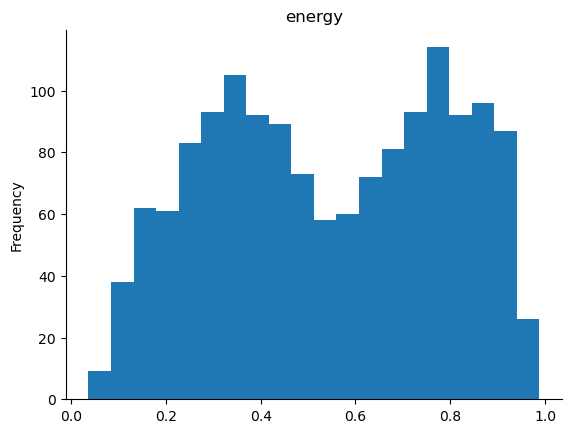

In [12]:
#energy

from matplotlib import pyplot as plt
train_df['energy'].plot(kind='hist', bins=20, title='energy')
plt.gca().spines[['top', 'right',]].set_visible(False)

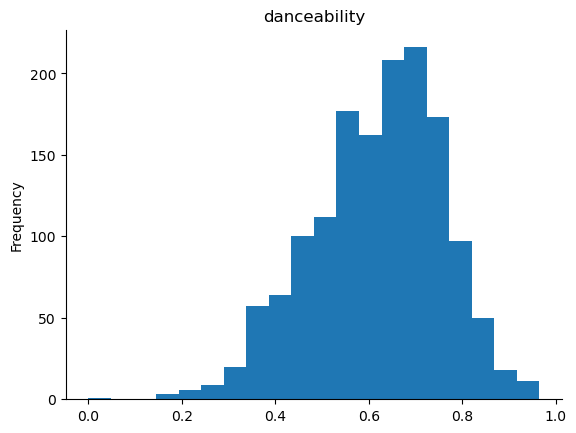

In [13]:
#  danceability

from matplotlib import pyplot as plt
train_df['danceability'].plot(kind='hist', bins=20, title='danceability')
plt.gca().spines[['top', 'right',]].set_visible(False)

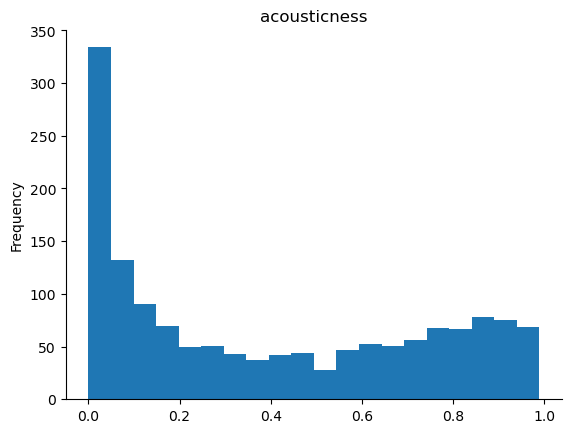

In [14]:
# acousticness

from matplotlib import pyplot as plt
train_df['acousticness'].plot(kind='hist', bins=20, title='acousticness')
plt.gca().spines[['top', 'right',]].set_visible(False)

C:\Users\hp\AppData\Local\Temp\ipykernel_22416\1411107467.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[i])
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\AppData\Local\Temp\ipykernel_22416\1411107467.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `hist

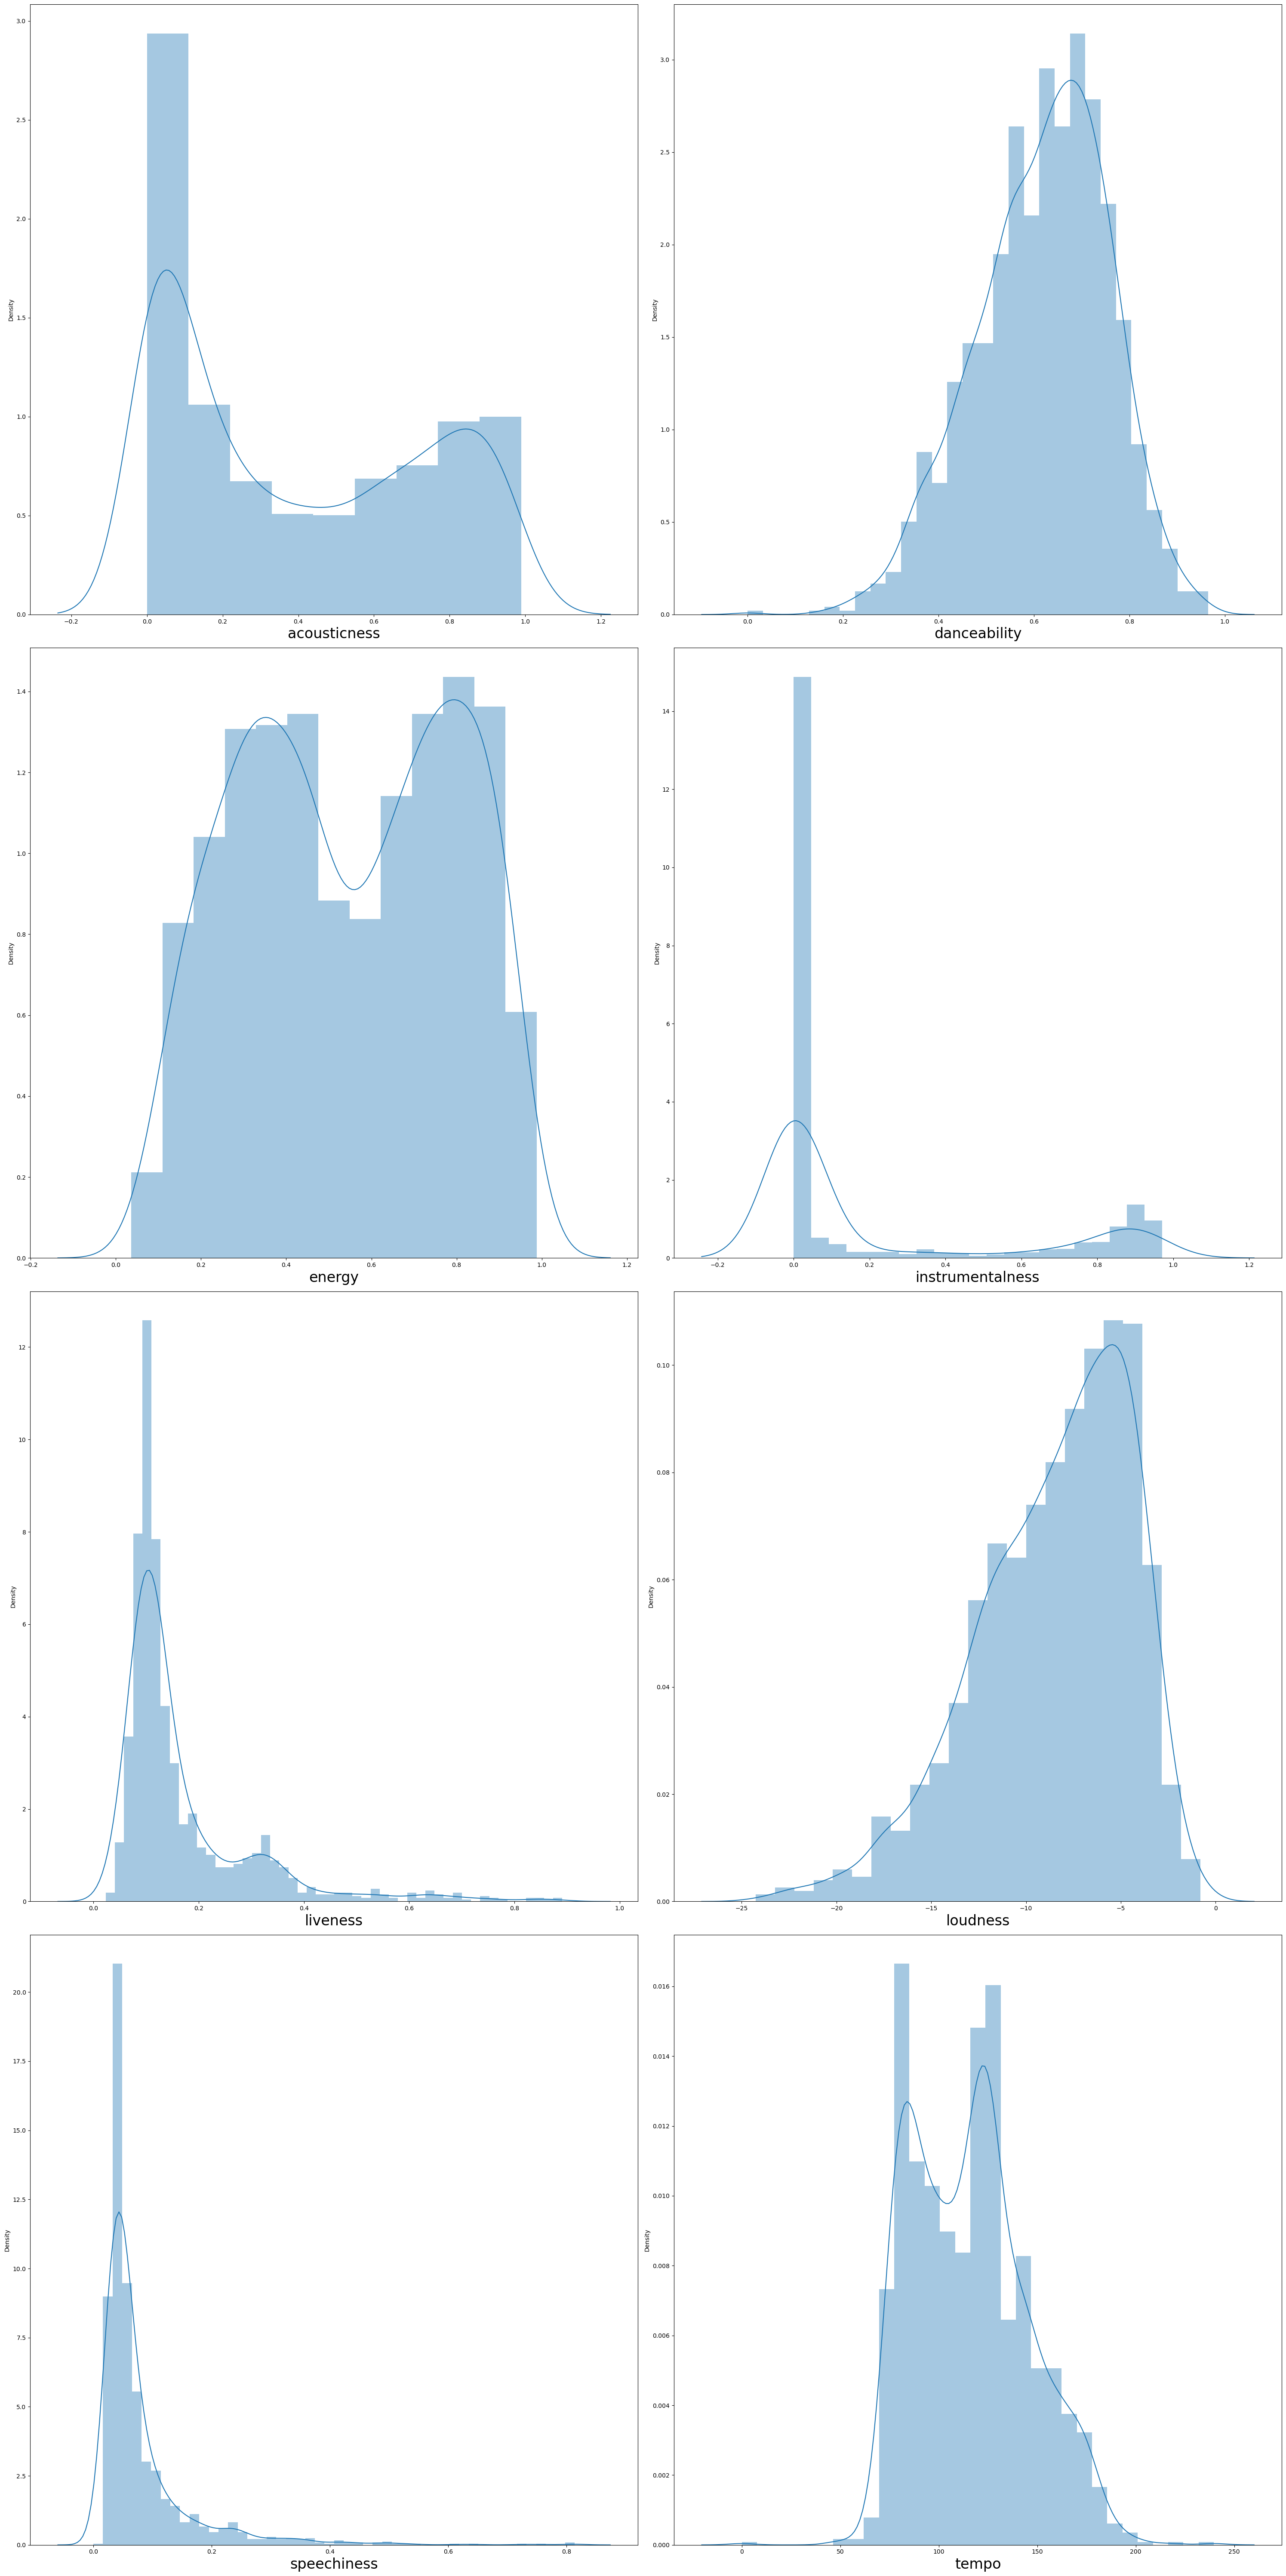

In [15]:
# Get the list of column names
cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
        'tempo']

k=0
plt.figure(figsize = (30,60))
for i in train_df.columns[:-1]:
    plt.subplot(4,2, k + 1)
    sns.distplot(train_df[i])
    plt.xlabel(i, fontsize=24)
    k +=1
plt.tight_layout()
plt.savefig("density.png")

## Distribution using kernel density estimate (KDE Plot)

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

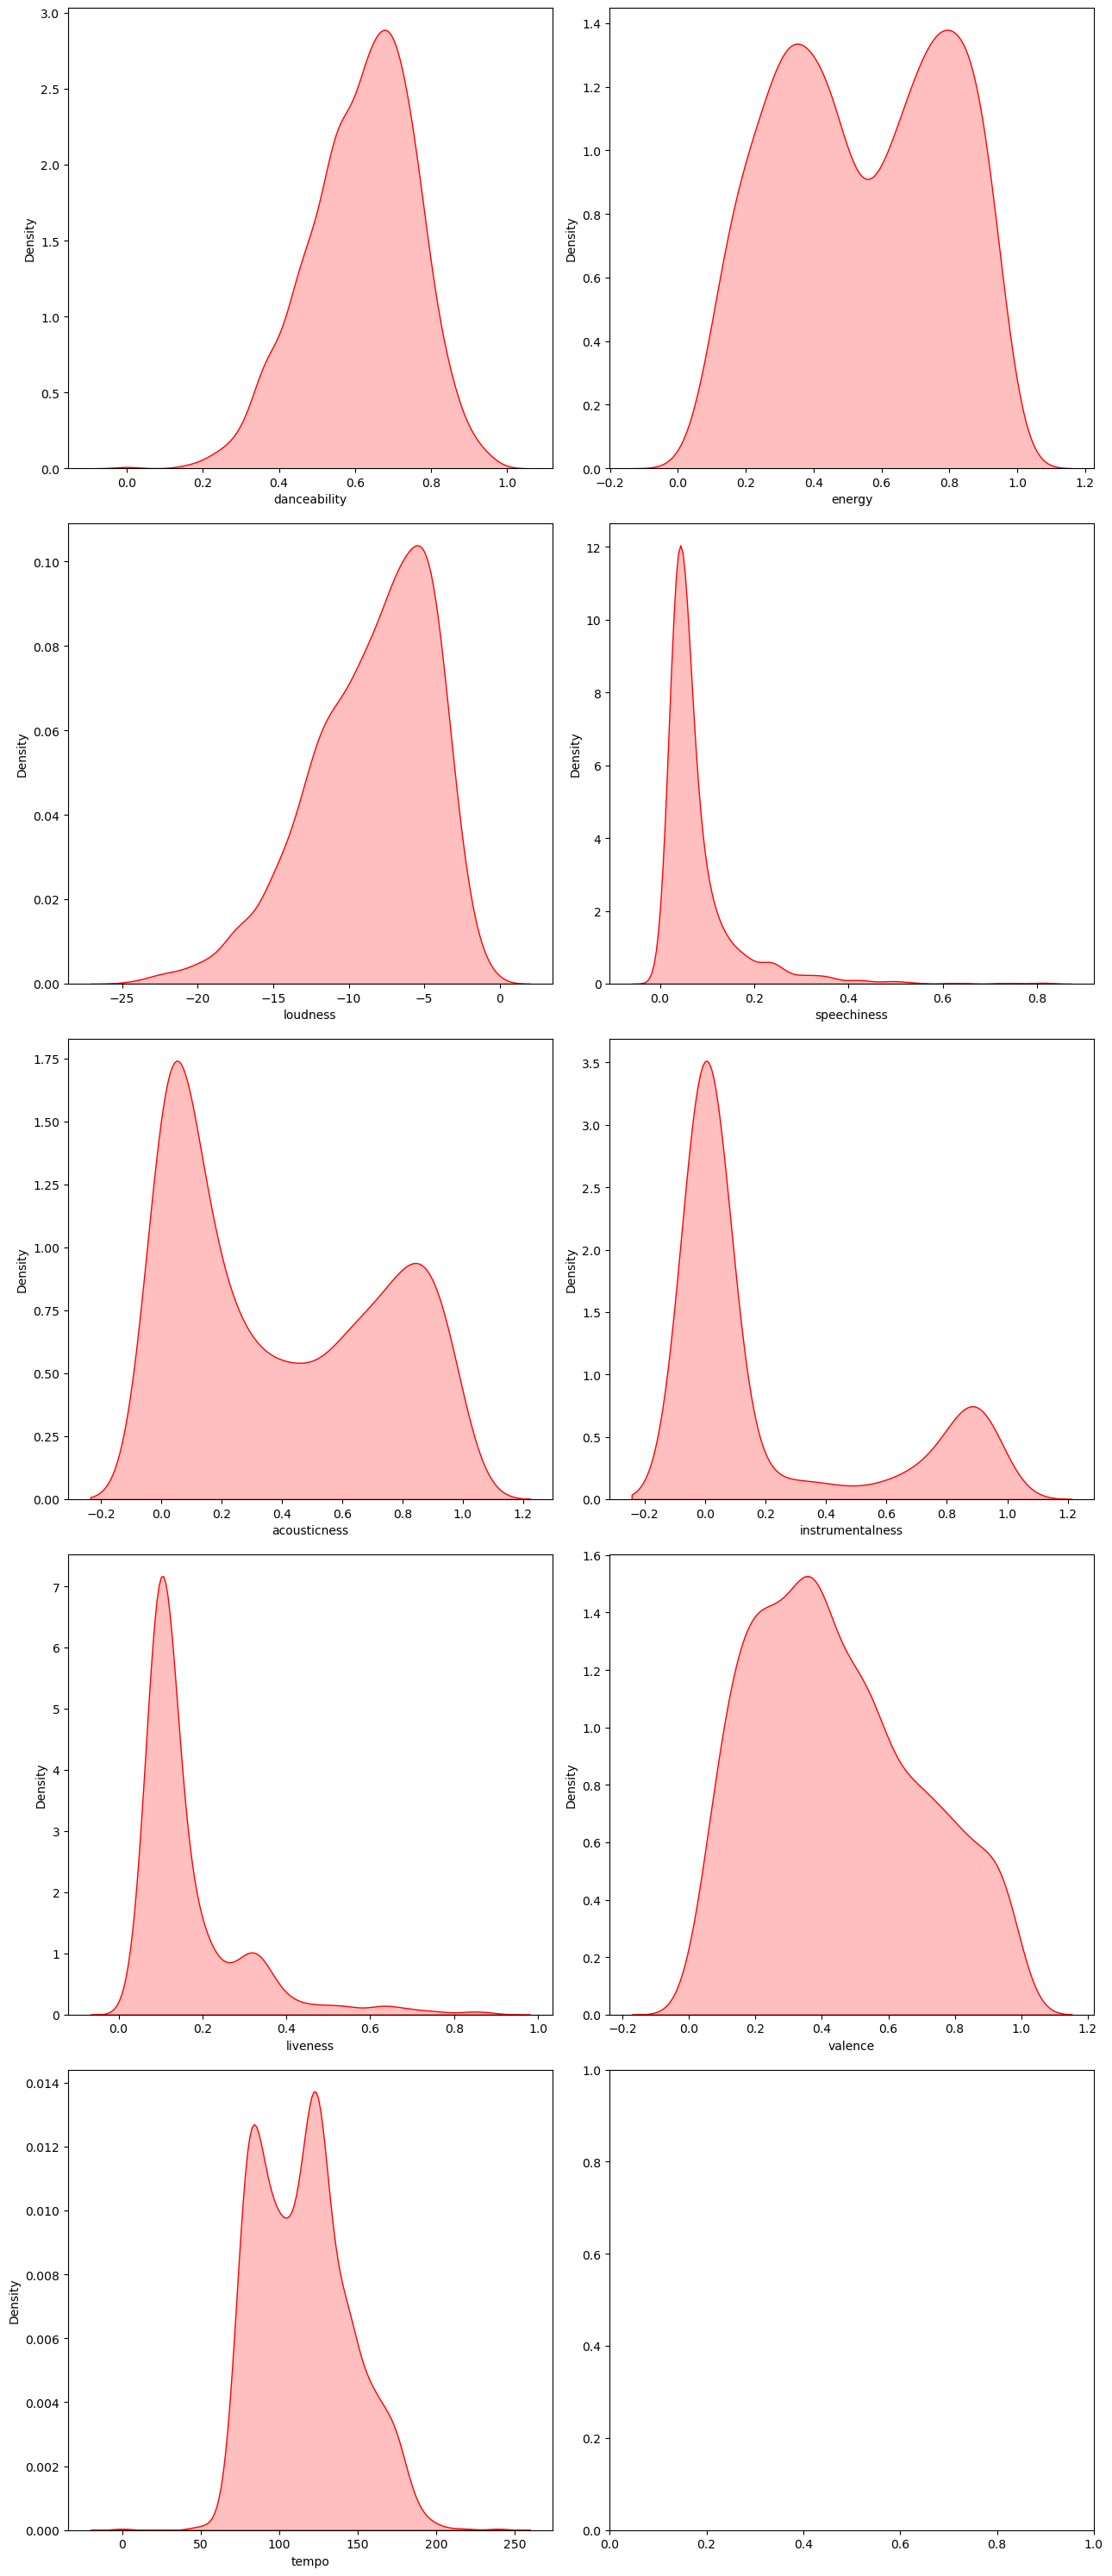

In [16]:
# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(13, 30))
axs = np.ravel(axs)

# Loop through the columns and plot the KDE plot
for i, col in enumerate(cols):
    plt.sca(axs[i])
    sns.kdeplot(data=train_df[col], fill=True, color='red')

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
train_df['mood']=y

## Class Conditional Distribution

In [18]:
def plot_class_cond(df):
    fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(13, 30))
    axs = np.ravel(axs)
    cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
            'tempo']
    # Loop through the columns and plot the KDE plot
    for i, col in enumerate(cols):
        plt.sca(axs[i])
        sns.kdeplot(data=df[col], fill=True, color='red')
    
    # Adjust the layout of the subplots
    plt.tight_layout()
    
    # Show the plot
    plt.savefig('class_cond.png')
    plt.show()

In [19]:
calm_df=train_df[train_df['mood']=='calm']
happy_df=train_df[train_df['mood']=='happy']
energetic_df=train_df[train_df['mood']=='energetic']
sad_df=train_df[train_df['mood']=='sad']

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

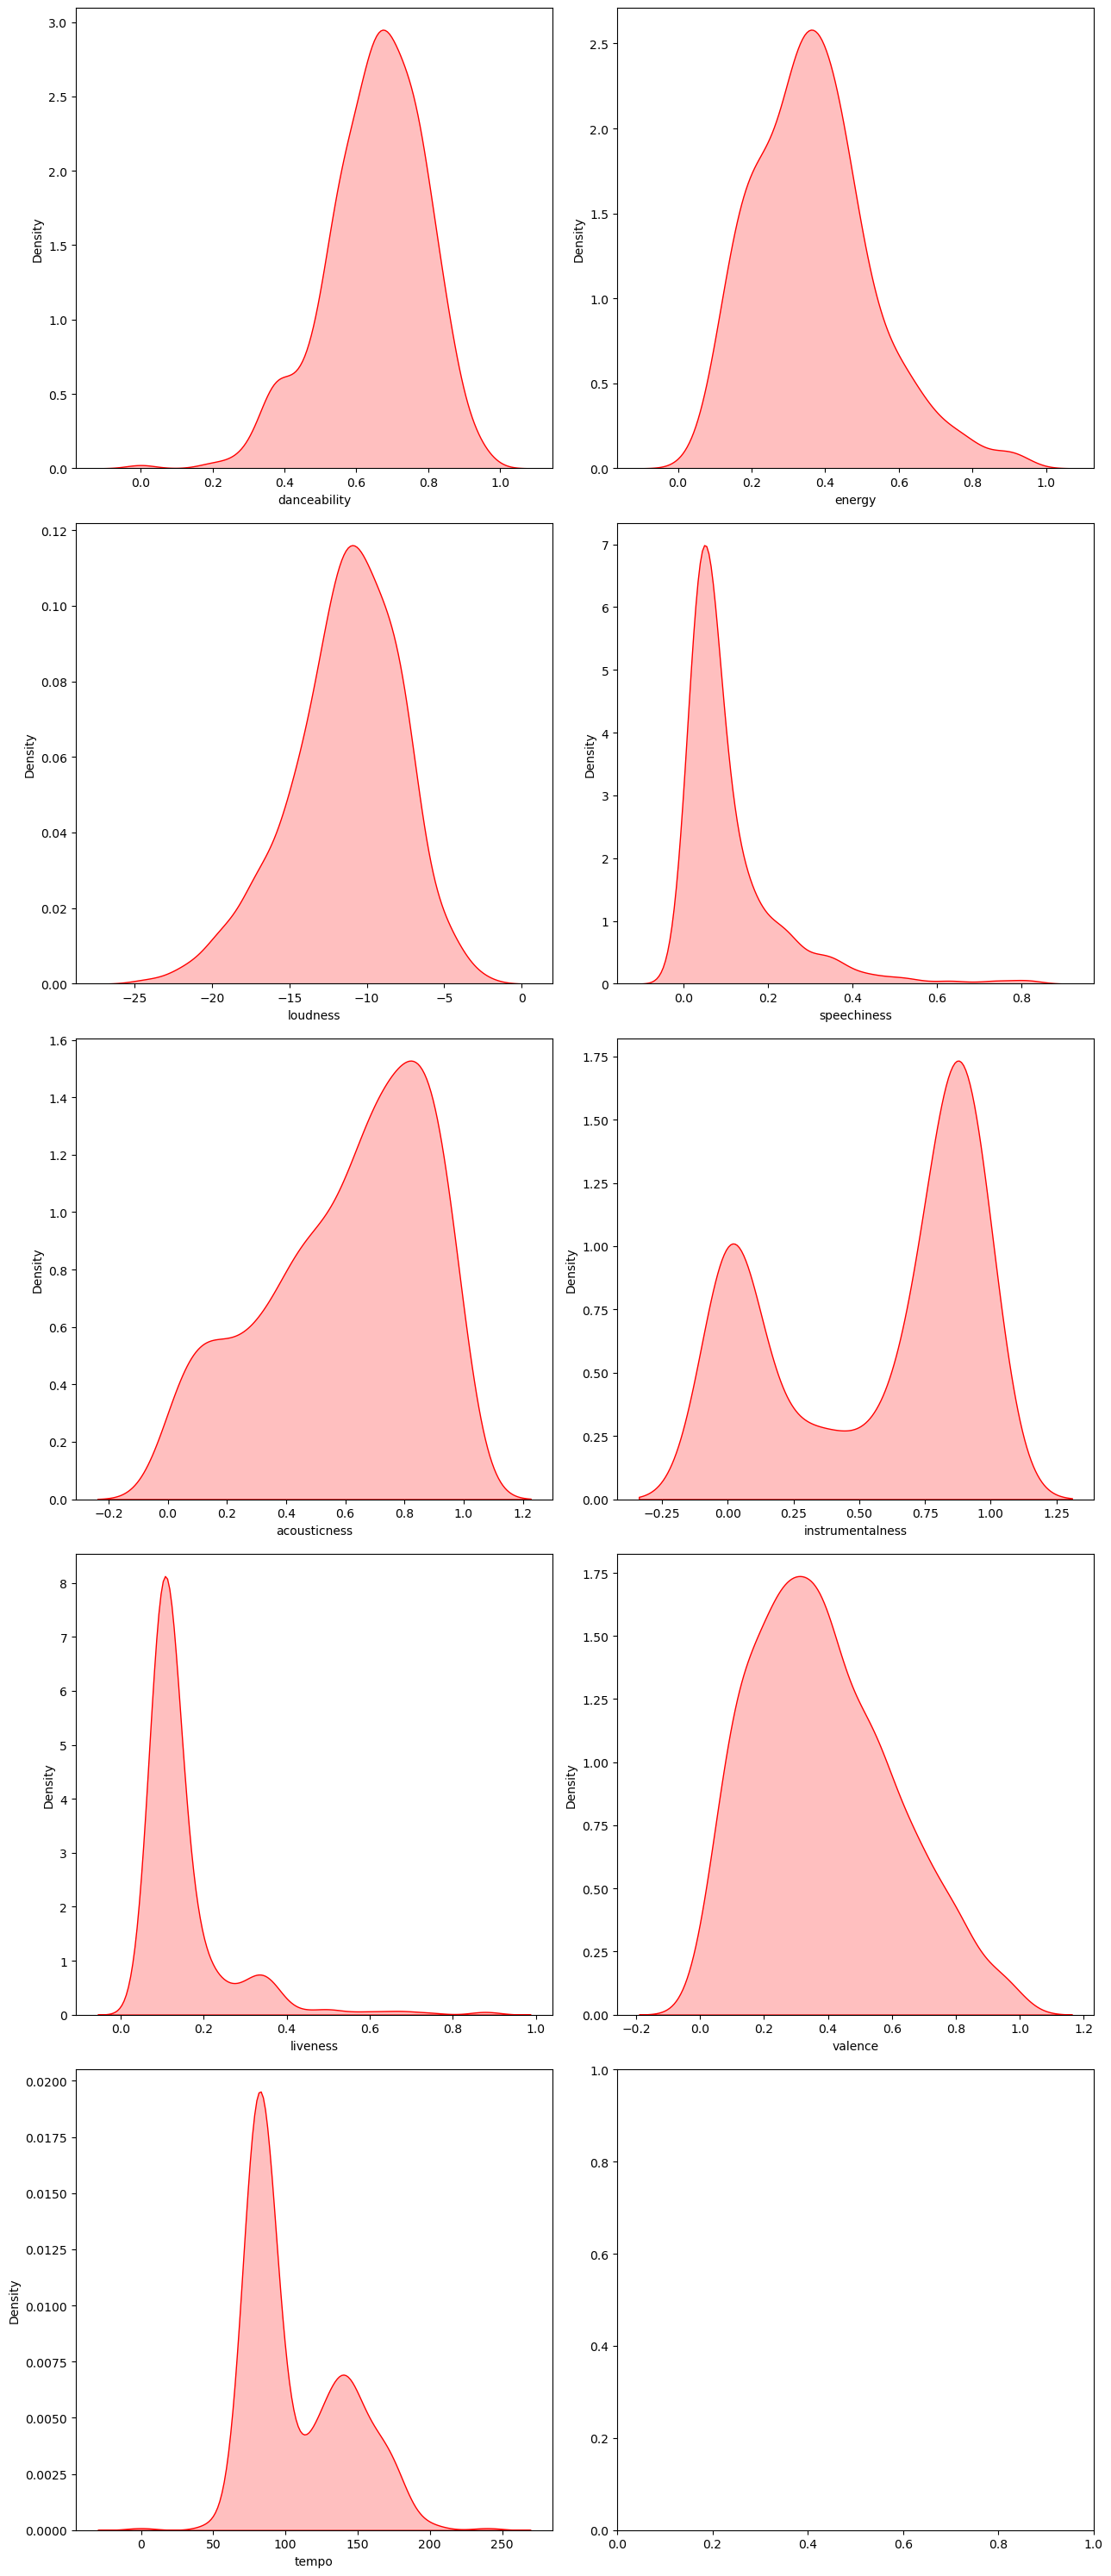

In [20]:
plot_class_cond(calm_df)

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

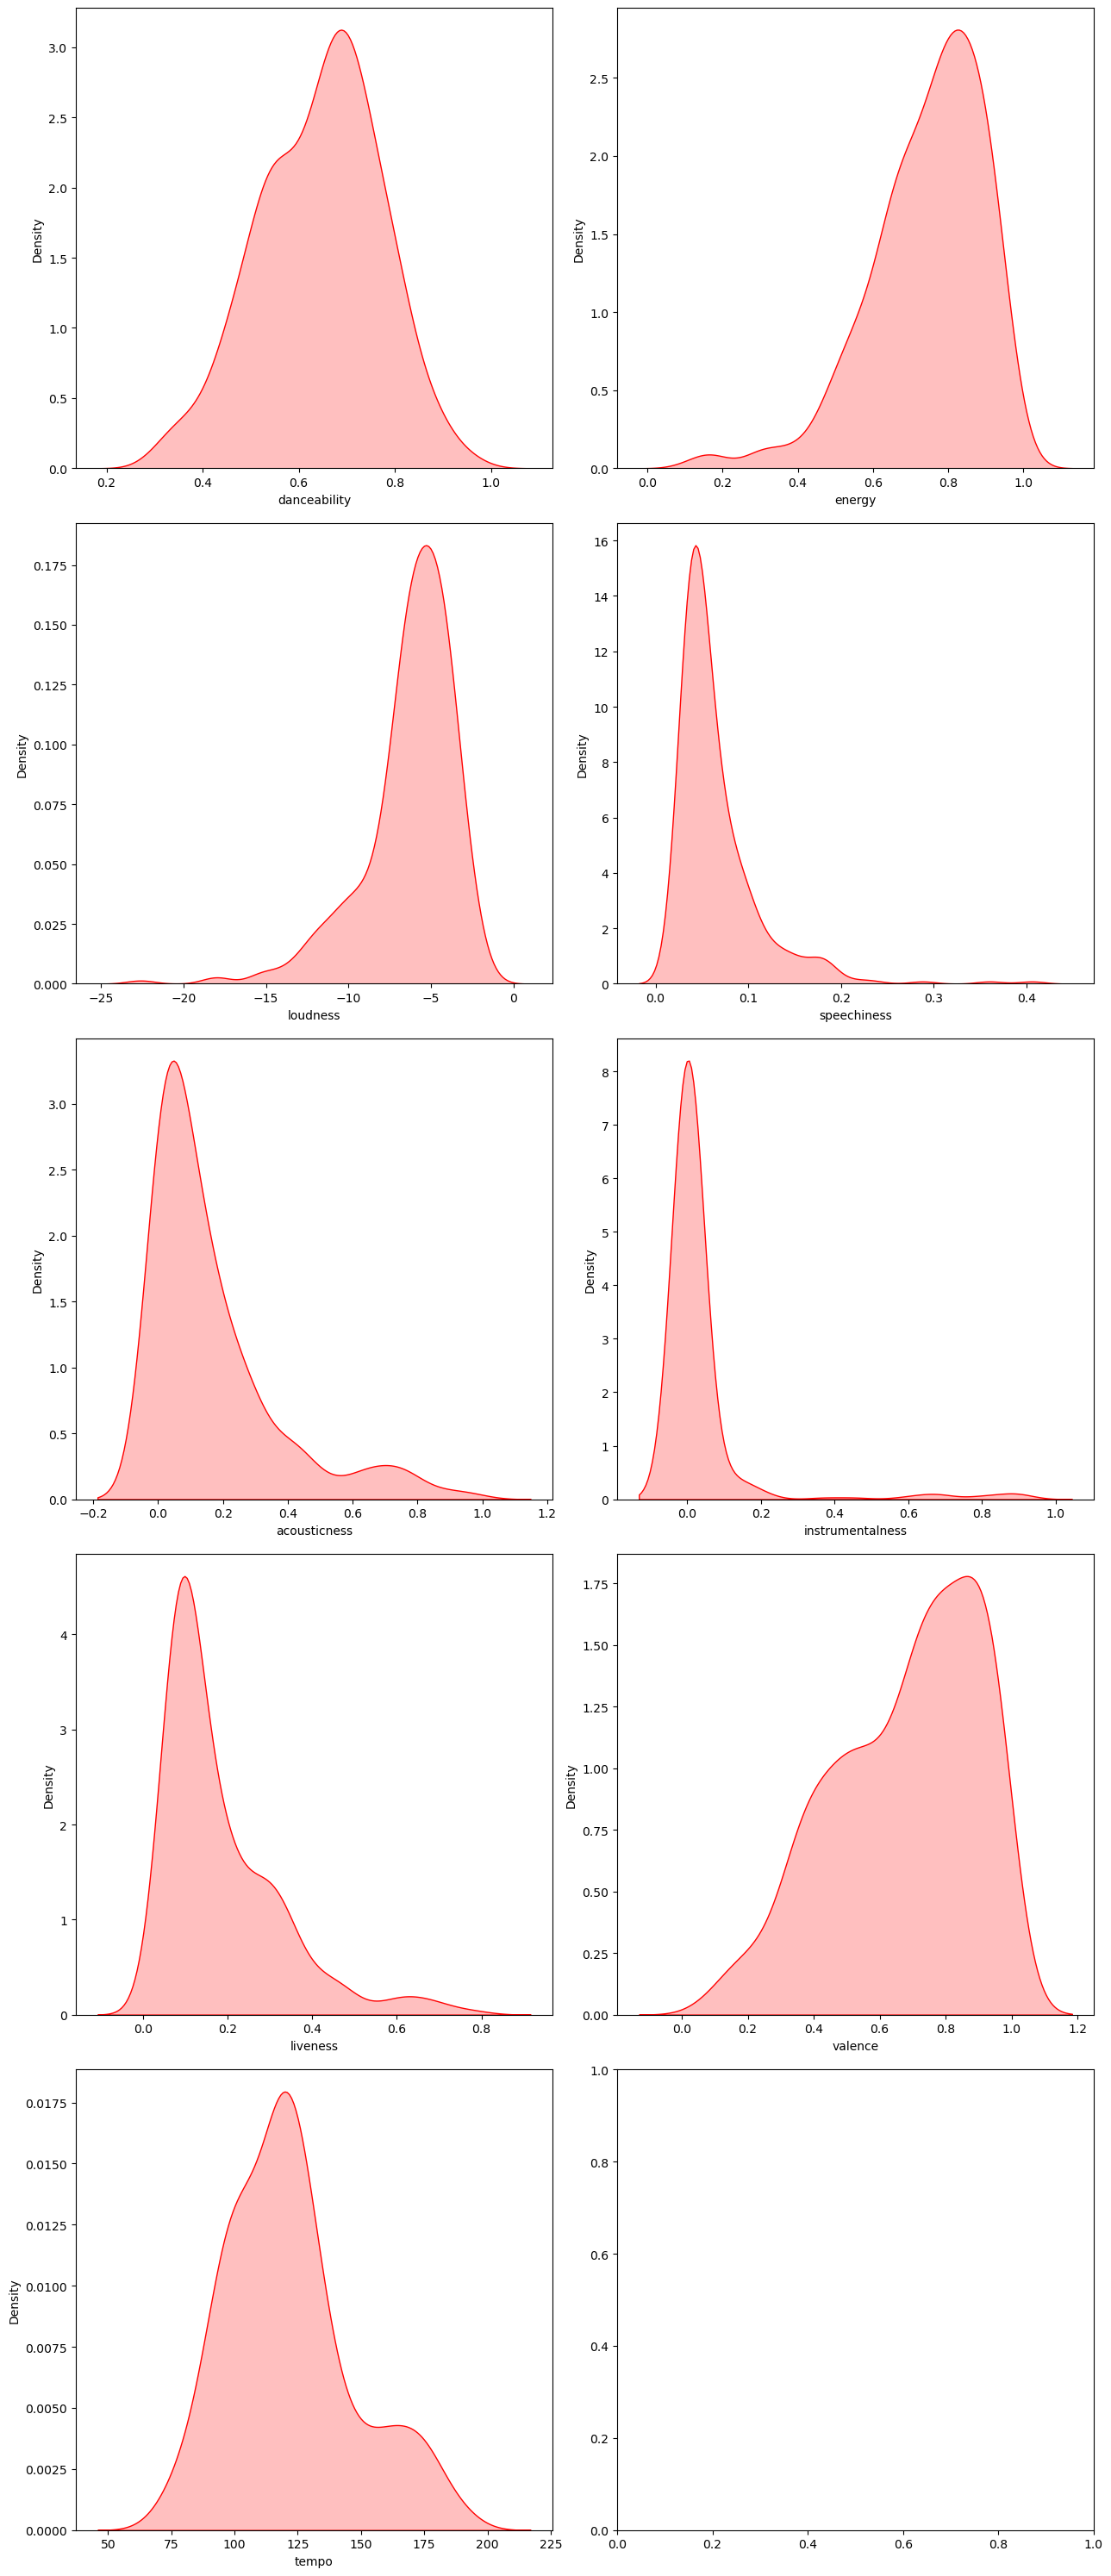

In [21]:
plot_class_cond(happy_df)
# plt.savefig('class_cond.png')

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

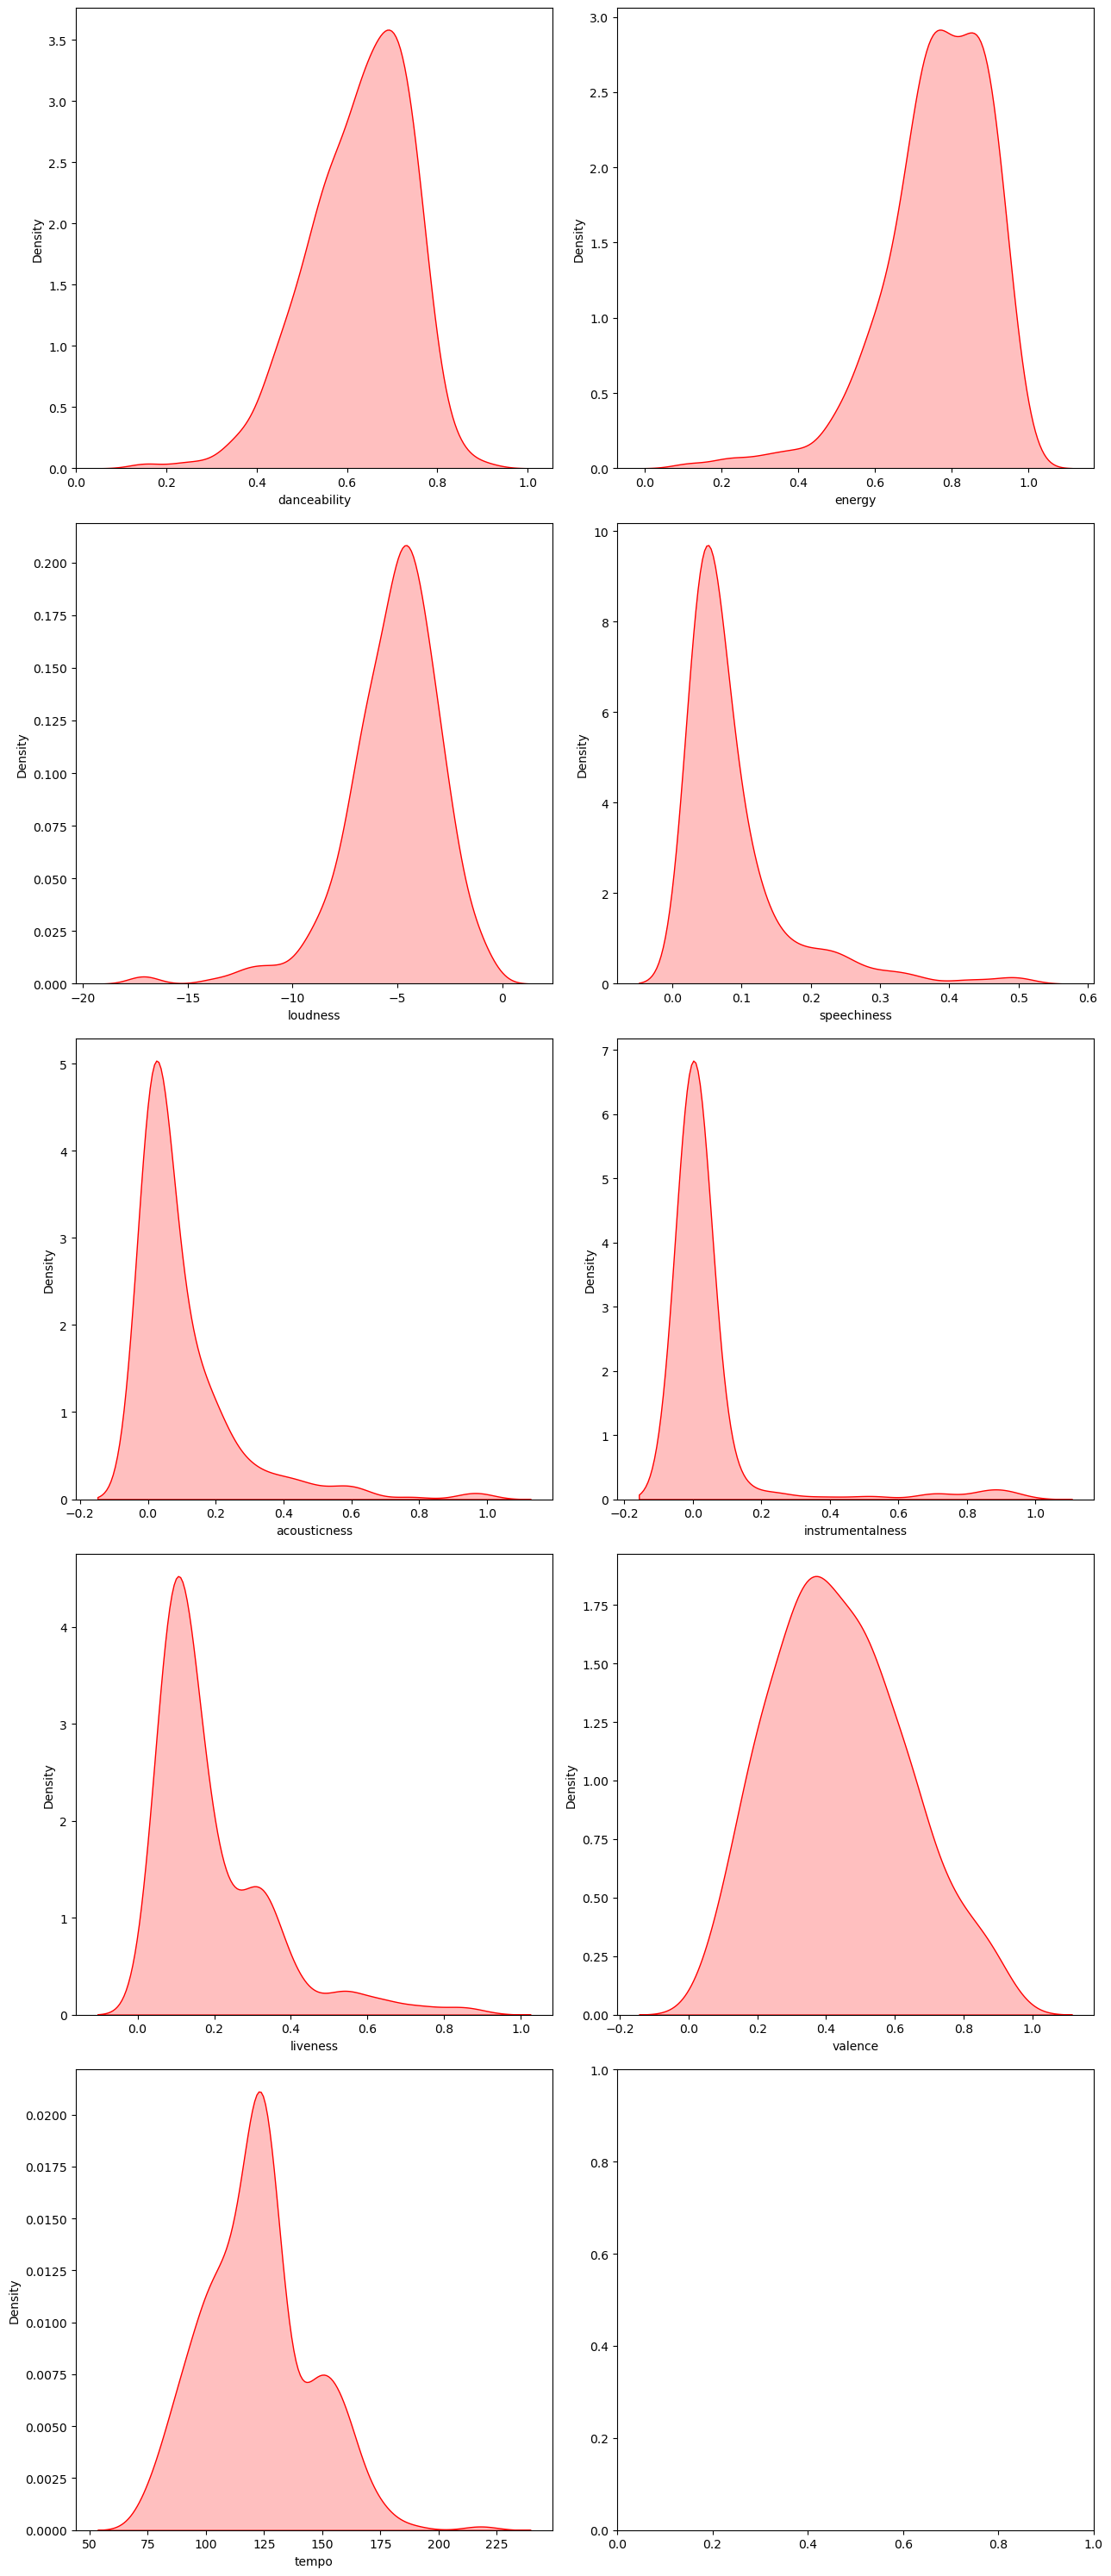

In [22]:
plot_class_cond(energetic_df)

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

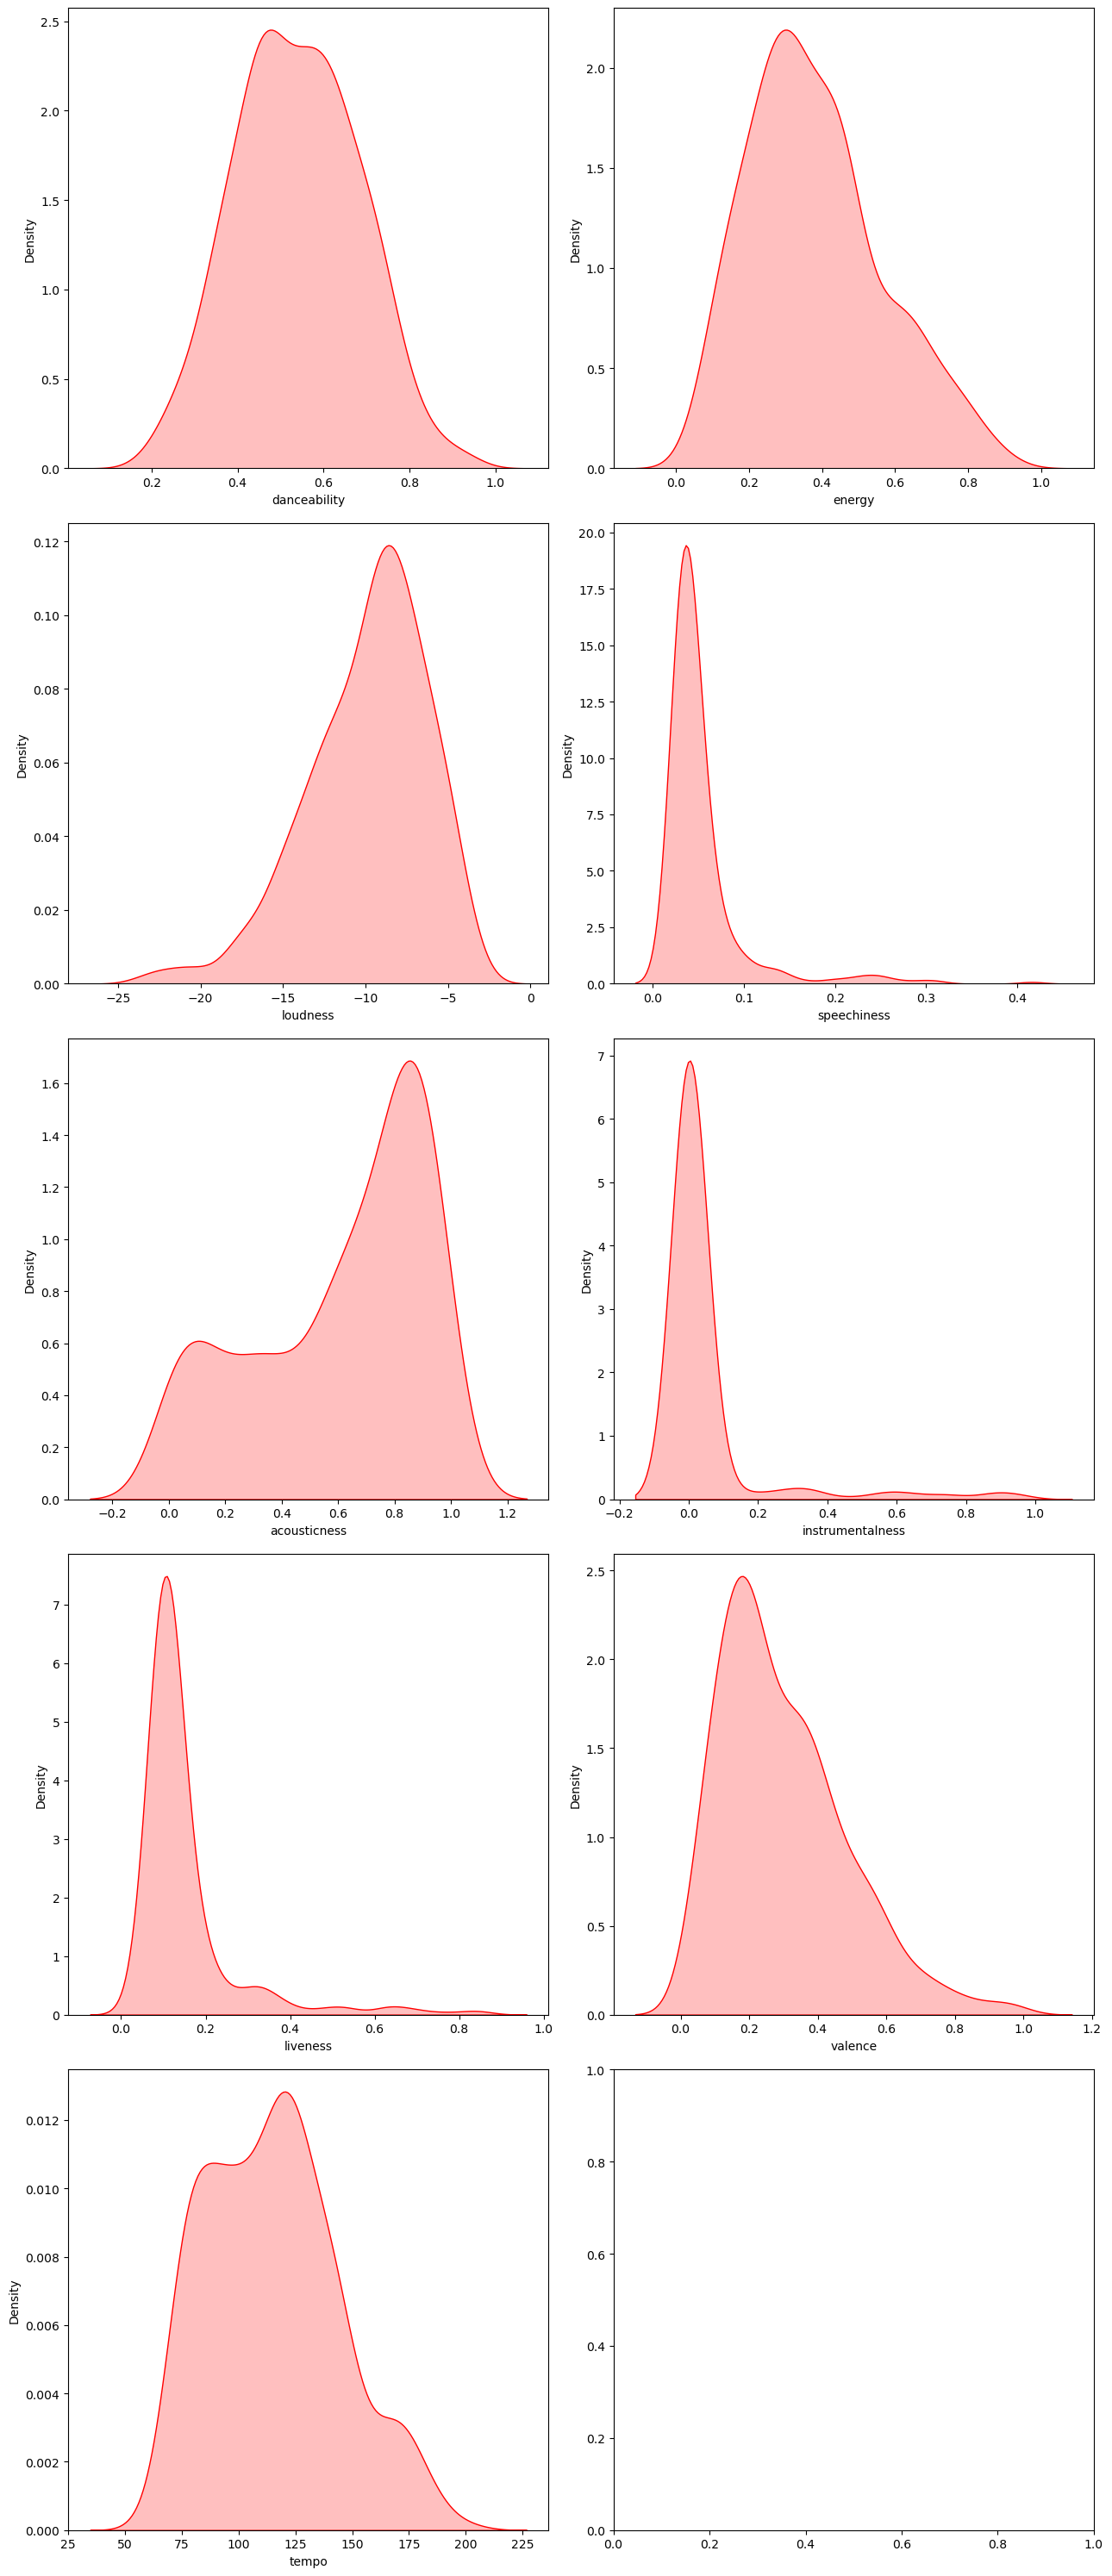

In [23]:
plot_class_cond(sad_df)

## Average Danceability in each mood

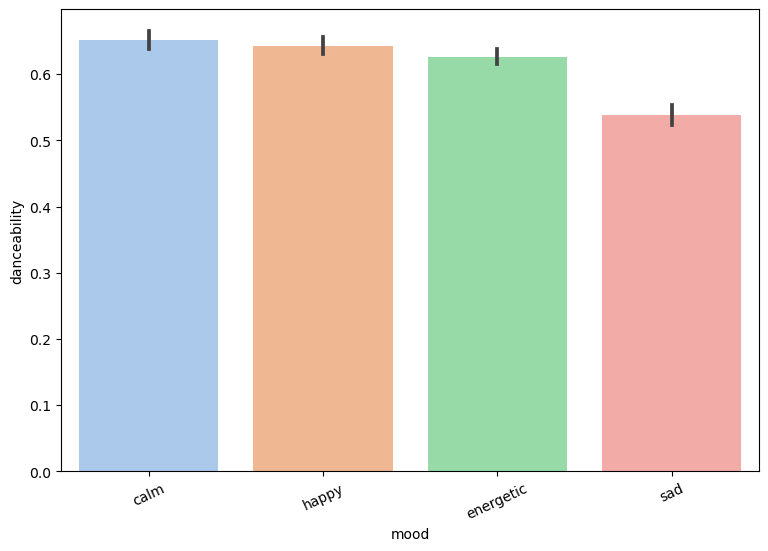

In [24]:
plt.figure(figsize=(9, 6))
plt.xticks(rotation=25)

custom_palette = sns.color_palette("pastel")

sns.barplot(data=train_df, x='mood', y='danceability', linewidth=2, palette=custom_palette)

plt.show()

## Average loudness in each mood

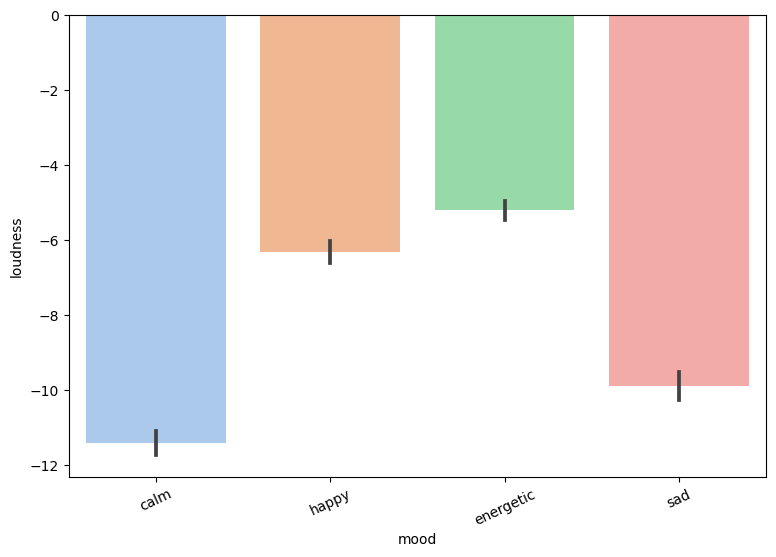

In [25]:
plt.figure(figsize=(9, 6))
plt.xticks(rotation=25)

custom_palette = sns.color_palette("pastel")

sns.barplot(data=train_df, x='mood', y='loudness', linewidth=2, palette=custom_palette)

plt.show()

## Average speechiness in each mood

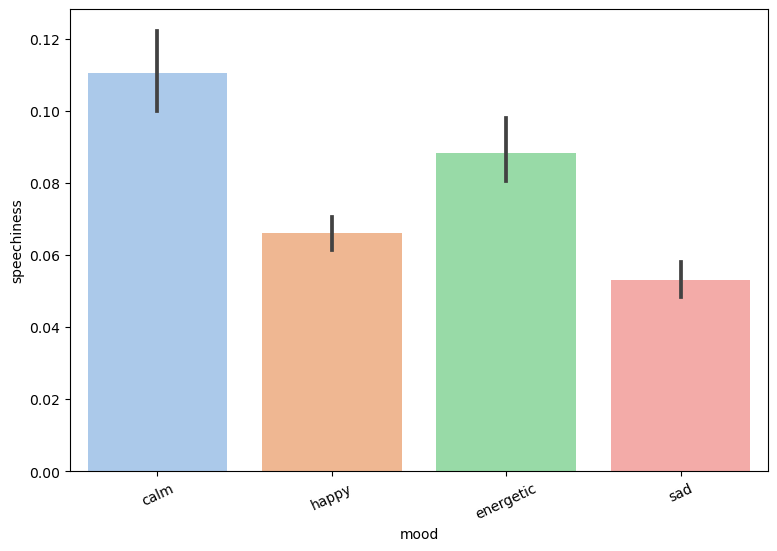

In [26]:
plt.figure(figsize=(9, 6))
plt.xticks(rotation=25)

custom_palette = sns.color_palette("pastel")

sns.barplot(data=train_df, x='mood', y='speechiness', linewidth=2, palette=custom_palette)

plt.show()

## Average energy in each mood

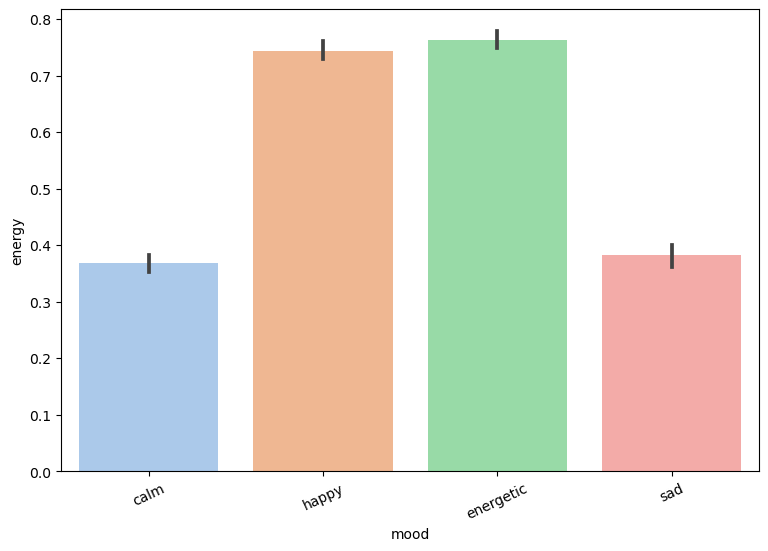

In [27]:
plt.figure(figsize=(9, 6))
plt.xticks(rotation=25)

custom_palette = sns.color_palette("pastel")

sns.barplot(data=train_df, x='mood', y='energy', linewidth=2, palette=custom_palette)

plt.show()

## Average Acousticness in each mood

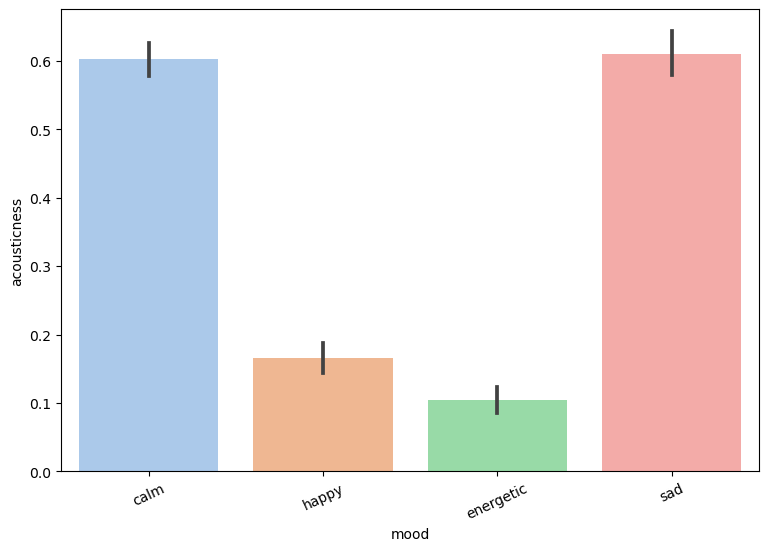

In [29]:
plt.figure(figsize=(9, 6))
plt.xticks(rotation=25)

custom_palette = sns.color_palette("pastel")

sns.barplot(data=train_df, x='mood', y='acousticness', linewidth=2, palette=custom_palette)

plt.show()

## Average liveness in each mood

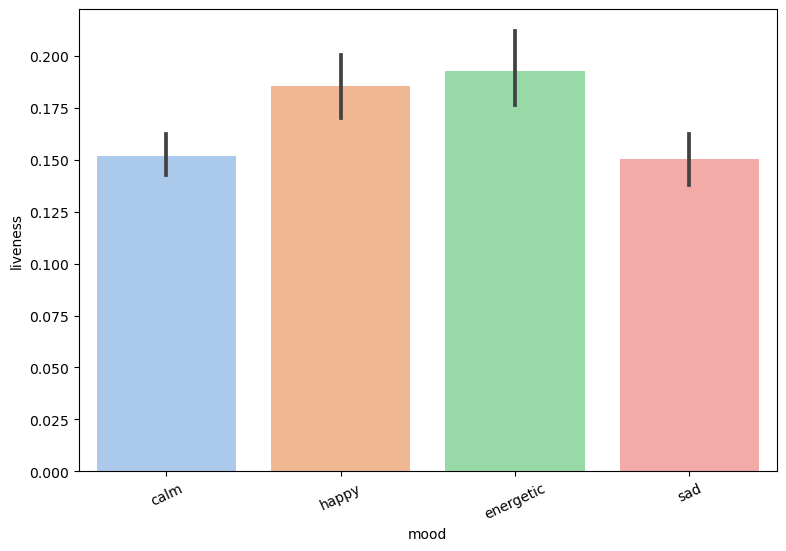

In [30]:
plt.figure(figsize=(9, 6))
plt.xticks(rotation=25)

custom_palette = sns.color_palette("pastel")

sns.barplot(data=train_df, x='mood', y='liveness', linewidth=2, palette=custom_palette)

plt.show()

## Average Valence in each mood

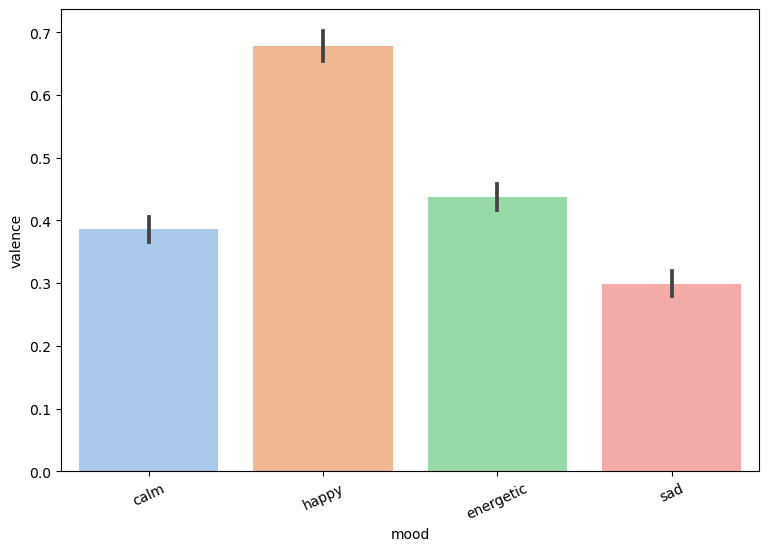

In [31]:
plt.figure(figsize=(9, 6))
plt.xticks(rotation=25)

custom_palette = sns.color_palette("pastel")

sns.barplot(data=train_df, x='mood', y='valence', linewidth=2, palette=custom_palette)

plt.show()

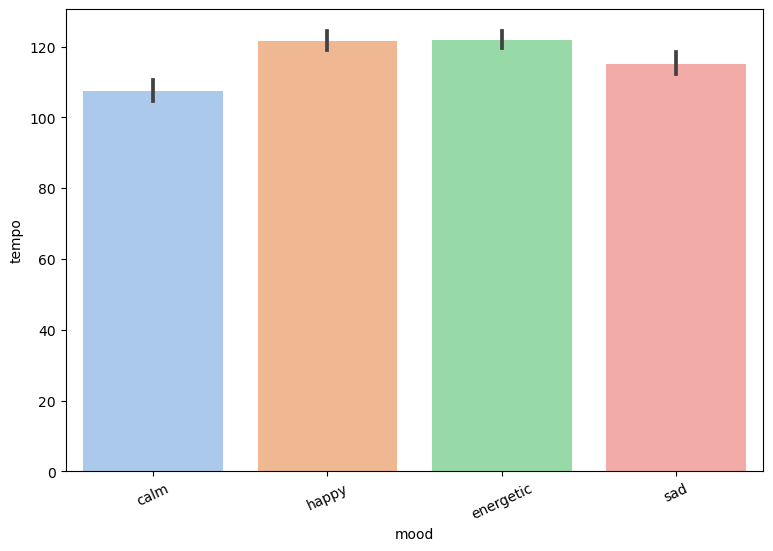

In [32]:
plt.figure(figsize=(9, 6))
plt.xticks(rotation=25)

custom_palette = sns.color_palette("pastel")

sns.barplot(data=train_df, x='mood', y='tempo', linewidth=2, palette=custom_palette)

plt.show()

## Radar Maps

In [33]:
def plot_radar_chart_mean(df, title):
    # Number of variables
    categories=['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
    values = df[['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].mean().tolist()
    num_vars = len(categories)

    # Compute angle each category is in
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is a circle, so we need to "complete the loop" and append the start value to the end.
    values += values[:1]
    angles += angles[:1]

    # Plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='black', size=10)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

    plt.title(title, loc='left')

    plt.show()

In [34]:
def plot_radar_chart_mean4(df1,df2,df3,df4):
    fig, axes = plt.subplots(2,2,figsize=(16,16), subplot_kw=dict(polar=True))
    df=[df1,df2,df3,df4]
    titles=["Calm", "Happy", "Energetic", "Sad"]
    axes=axes.flatten()
    for i,ax in enumerate(axes):
        # print(i)
    # Number of variables
        categories=['danceability', 'energy', 'loudness', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
        
        values = df[i][['danceability', 'energy', 'loudness', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].mean().tolist()
        num_vars = len(categories)
    
        # Compute angle each category is in
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
        # The plot is a circle, so we need to "complete the loop" and append the start value to the end.
        values += values[:1]
        angles += angles[:1]
    
        # Plot
        
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
    
        # Draw one axe per variable + add labels
        ax.set_xticks(angles[:-1], categories, color='black', size=10)
    
        # Plot data
        ax.plot(angles, values, linewidth=1, linestyle='solid')
    
        # Fill area
        ax.fill(angles, values, 'b', alpha=0.1)
        ax.set_title(titles[i])
    plt.tight_layout()
    # plt.title('Radar charts')
    plt.savefig('Radars.png')
    plt.show()

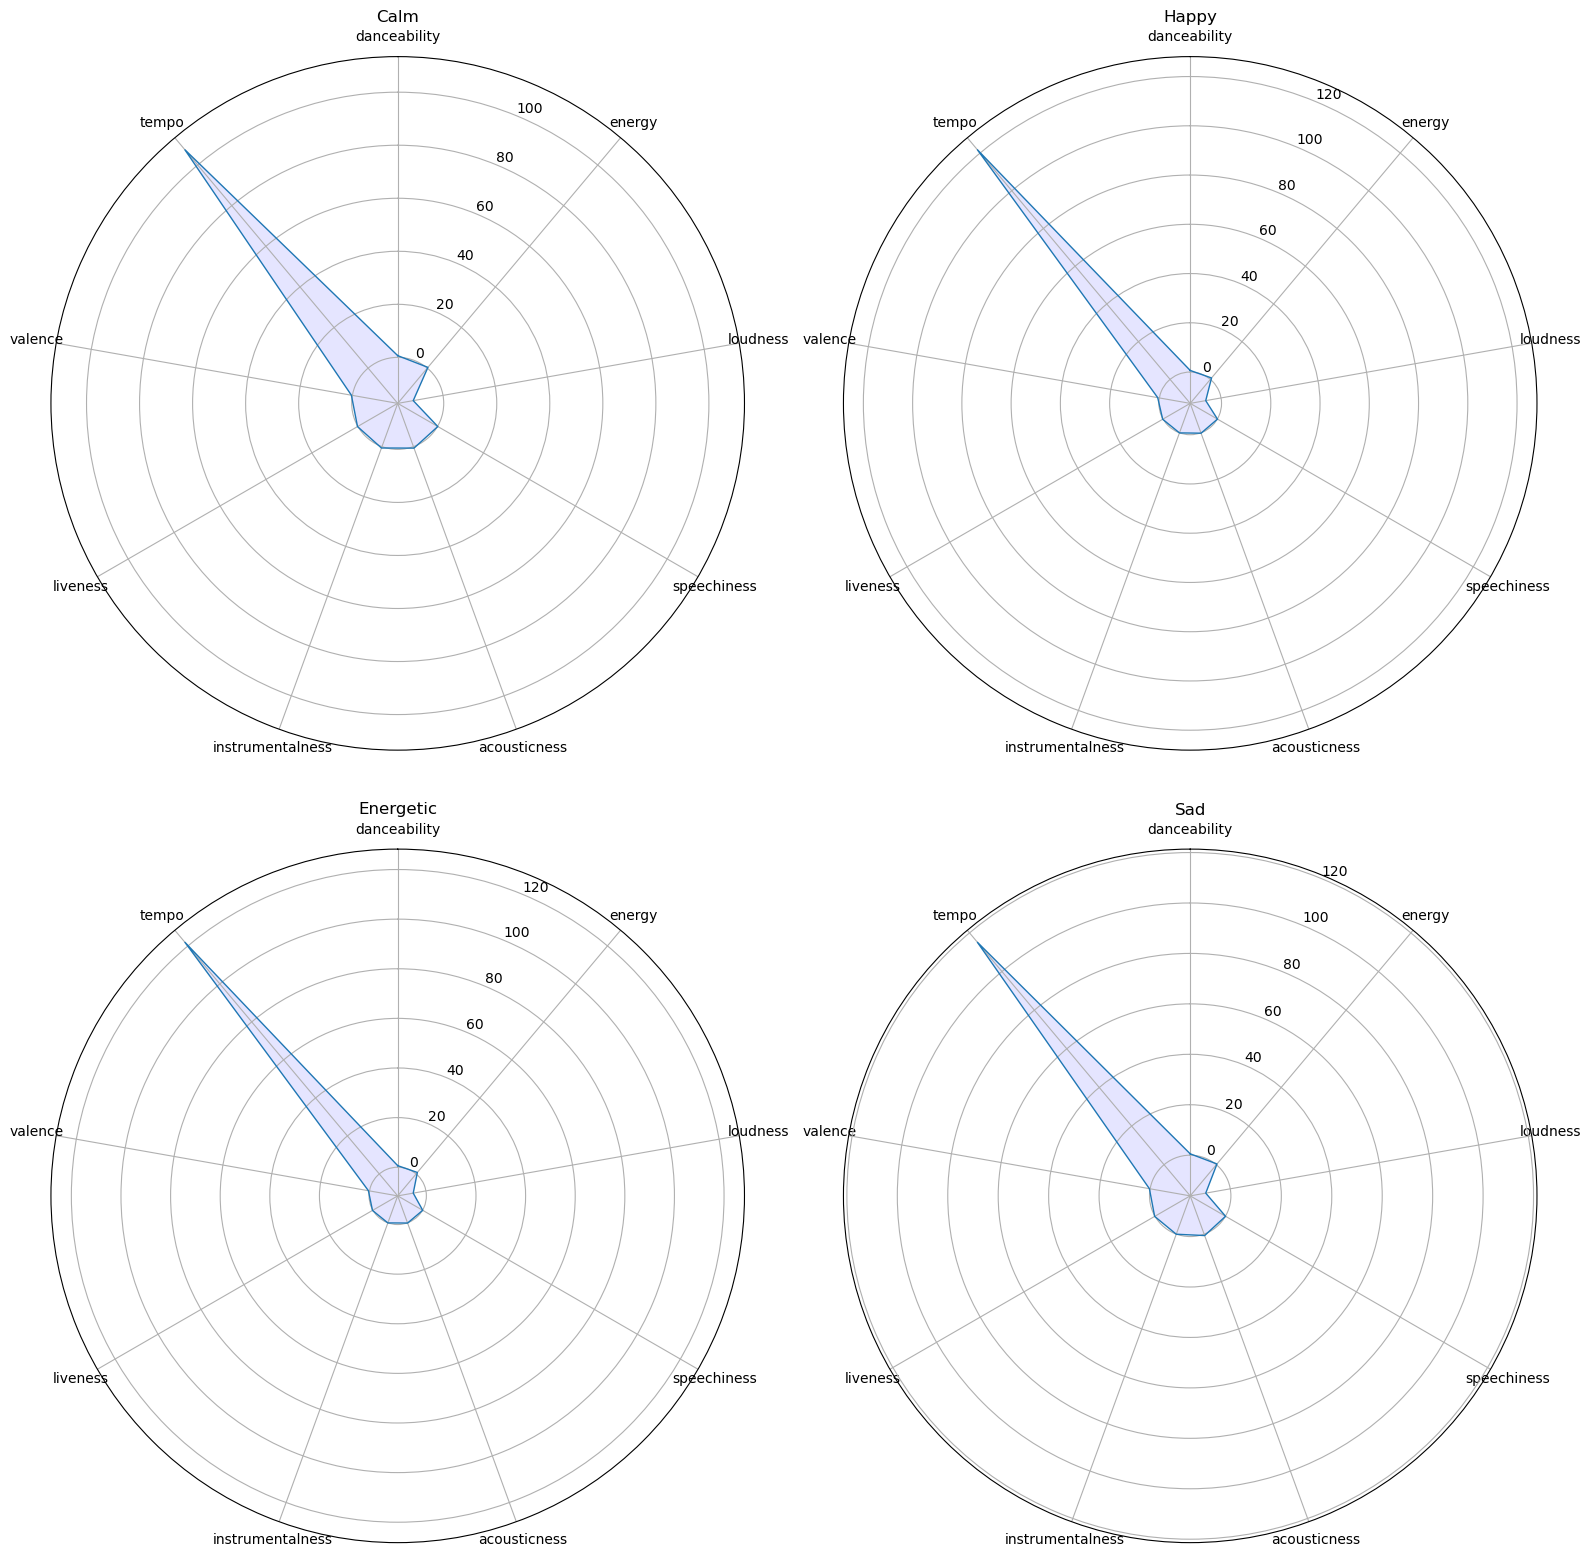

In [35]:
plot_radar_chart_mean4(calm_df,happy_df,energetic_df,sad_df)

In [36]:
def plot_radar_chart_median(df, title):
    # Number of variables
    categories=['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
    values = df[['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].median().tolist()
    num_vars = len(categories)

    # Compute angle each category is in
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is a circle, so we need to "complete the loop" and append the start value to the end.
    values += values[:1]
    angles += angles[:1]

    # Plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='black', size=10)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

    plt.title(title, loc='left')

    plt.show()

In [37]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler() #intantiate a scaler

def normalize(df):
  # Find numerical columns
  numerical_columns = df.select_dtypes(include=['int', 'float']).columns


  # Apply the custom scaling operation separately for each column
#   for column in numerical_columns:
#       min_val = df[column].min()
#       max_val = df[column].max()

#       # Apply the scaling operation
#       if max_val==min_val:
#         df[column]=df[column]/max_val
#       else:
#         df[column] = (df[column] - min_val) / (max_val - min_val)
# #       df[column] = df[column] * (max_val - min_val) + min_val

  for column in numerical_columns:
    values=df[column].values
    values_scaled=scaler.fit_transform(values.reshape(-1, 1))
    df[column]=values_scaled

  return df

In [38]:
calm_df=normalize(calm_df)

C:\Users\hp\AppData\Local\Temp\ipykernel_22416\256194985.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=values_scaled
C:\Users\hp\AppData\Local\Temp\ipykernel_22416\256194985.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=values_scaled
C:\Users\hp\AppData\Local\Temp\ipykernel_22416\256194985.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [40]:
calm_df=calm_df.drop(['mood'], axis=1)

In [41]:
happy_df=happy_df.drop(['mood'], axis=1)
happy_df=normalize(happy_df)
energetic_df=energetic_df.drop(['mood'], axis=1)
energetic_df=normalize(energetic_df)
sad_df=sad_df.drop(['mood'], axis=1)
sad_df=normalize(sad_df)

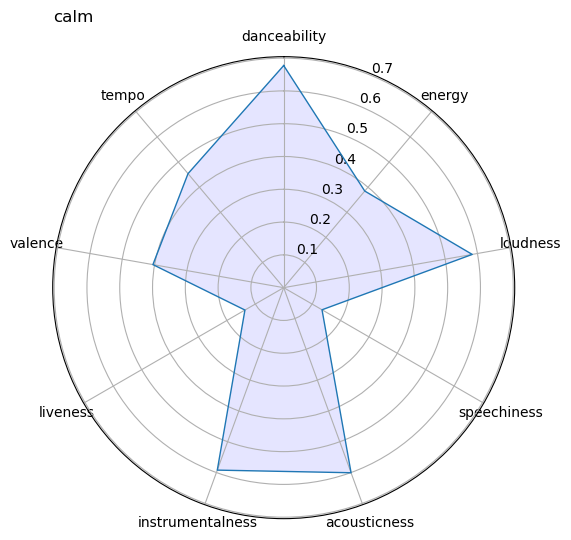

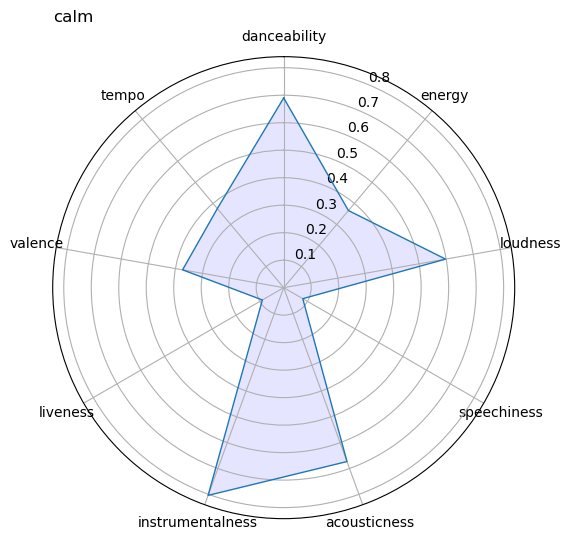

In [133]:
plot_radar_chart_mean(calm_df, 'calm')
plot_radar_chart_median(calm_df, 'calm')

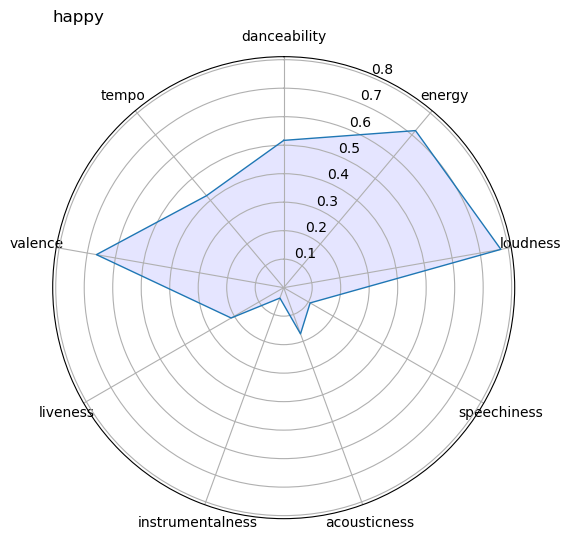

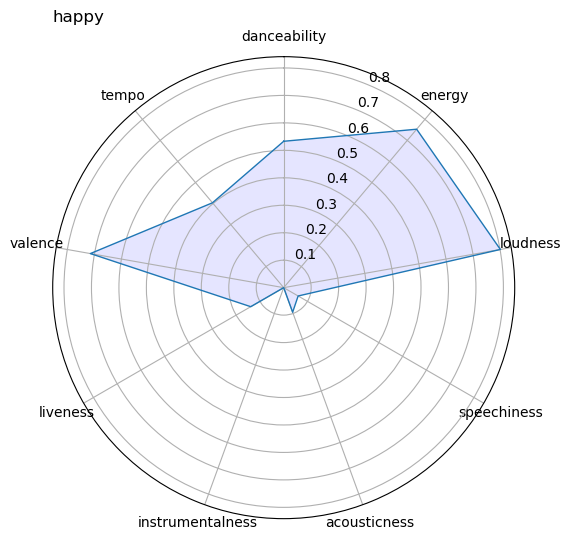

In [42]:
plot_radar_chart_mean(happy_df, 'happy')
plot_radar_chart_median(happy_df, 'happy')

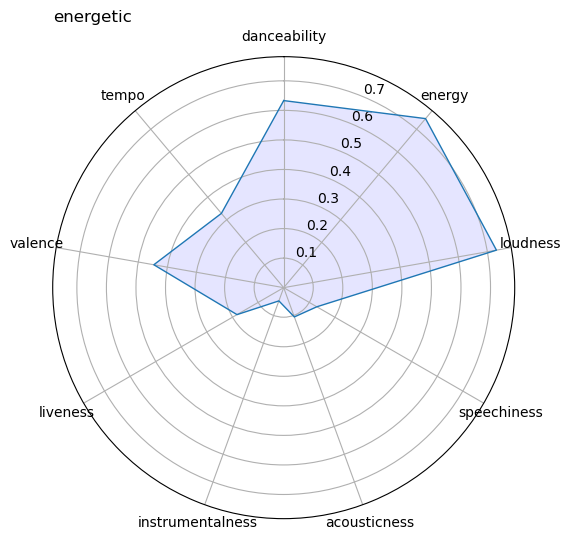

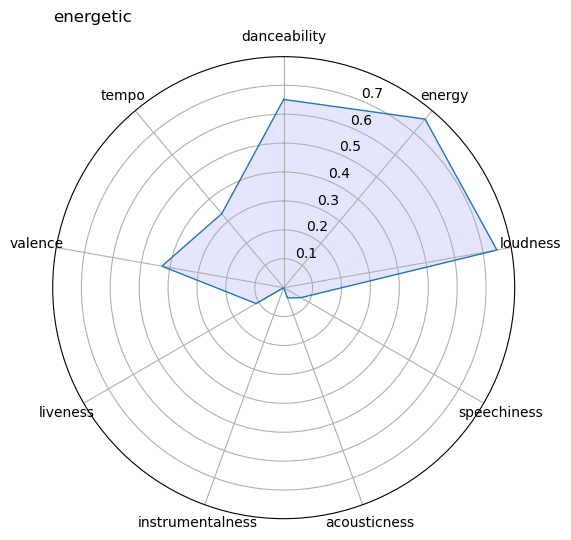

In [43]:
plot_radar_chart_mean(energetic_df, 'energetic')
plot_radar_chart_median(energetic_df, 'energetic')

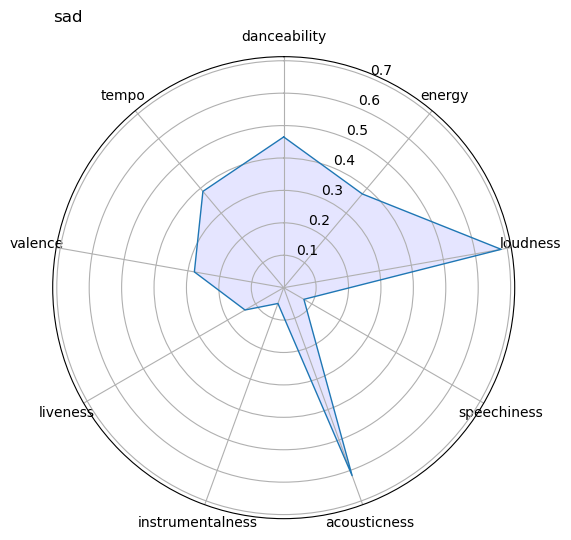

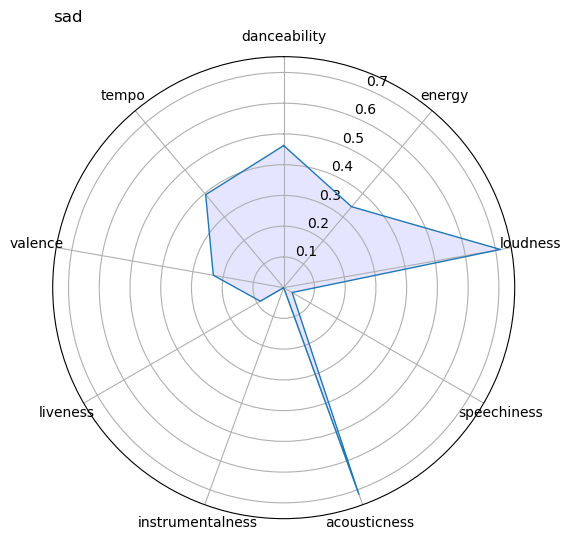

In [44]:
plot_radar_chart_mean(sad_df, 'sad')
plot_radar_chart_median(sad_df, 'sad')

# Feature Selection Analysis using PCA

In [49]:
X=pd.read_csv("final_train.csv")
X.head()

mood  acousticness  danceability  energy  instrumentalness  liveness  \
0  calm        0.9490         0.735   0.456             0.878     0.118   
1  calm        0.0859         0.773   0.291             0.898     0.117   
2  calm        0.3740         0.636   0.438             0.837     0.873   
3  calm        0.8420         0.768   0.574             0.926     0.115   
4  calm        0.4880         0.766   0.238             0.935     0.124   

   loudness  speechiness    tempo  valence  timeSignature  
0   -12.937       0.0524  147.970    0.708              4  
1   -15.935       0.0781   80.006    0.601              4  
2   -12.560       0.0707  149.981    0.915              4  
3    -7.573       0.0578   74.997    0.299              4  
4   -11.831       0.0445  105.000    0.394              4

In [50]:
X=X.drop(columns=["timeSignature", "mood"])

### Standardization of data

In [51]:
X=(X-X.mean())/X.std()
X.head()

acousticness  danceability    energy  instrumentalness  liveness  loudness  \
0      1.644240      0.850438 -0.361958          1.937121 -0.385616 -1.064390   
1     -0.905543      1.128964 -1.030623          1.994756 -0.393167 -1.795770   
2     -0.054433      0.124806 -0.434904          1.818968  5.315280 -0.972418   
3      1.328139      1.092316  0.116239          2.075446 -0.408268  0.244191   
4      0.282347      1.077656 -1.245407          2.101382 -0.340311 -0.794574   

   speechiness     tempo   valence  
0    -0.336563  1.081026  1.048253  
1    -0.027024 -1.232240  0.615190  
2    -0.116152  1.149473  1.886047  
3    -0.271524 -1.402729 -0.607100  
4    -0.431713 -0.381528 -0.222605

### Find the eigenvectors and eigenvalues of the covariance matrix

In [52]:
from numpy.linalg import eig

def eigen_calculation(X):
    cov_mat = np.cov(X.T)
    # Eigendecomposition of covariance matrix
    eig_vals, eig_vecs = eig(cov_mat) 

    # Adjusting the eigenvectors (loadings) that are largest in absolute value to be positive
    max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
    signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
    eig_vecs = eig_vecs*signs[np.newaxis,:]
    eig_vecs = eig_vecs.T

    # print('Eigenvalues \n', eig_vals)
    # print('Eigenvectors \n', eig_vecs)
    
    return eig_vals, eig_vecs

In [53]:
def sorted_eigens(X):
    eig_vals,eig_vecs = eigen_calculation(X)
    # We first make a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

    # Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
    eig_pairs.sort(key=lambda x: x[0], reverse=True)

    # For further usage
    eig_vals_sorted = np.array([x[0] for x in eig_pairs])
    eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

    # print(eig_pairs)
    
    return eig_vals_sorted, eig_vecs_sorted

#### This function displays the cumulative variance explained by selecting some of the principal components with the highest eigenvalues

In [54]:
def display_explained_var(eig_vals_sorted,eig_vecs):
    eig_vals_total = sum(eig_vals_sorted)
    explained_variance = [(i / eig_vals_total)*100 for i in eig_vals_sorted]
    explained_variance = np.round(explained_variance, 2)
    cum_explained_variance = np.cumsum(explained_variance)

    print('Explained variance: {}'.format(explained_variance))
    print('Cumulative explained variance: {}'.format(cum_explained_variance))

    plt.plot(np.arange(1,len(eig_vals_sorted)+1), cum_explained_variance, '-o')
    plt.xticks(np.arange(1,len(eig_vals_sorted)+1))
    plt.xlabel('Number of components')
    plt.ylabel('Cumulative explained variance');
    plt.show()

Explained variance: [34.2  16.84 11.35 10.56  8.94  7.17  5.72  3.61  1.58]
Cumulative explained variance: [34.2  51.04 62.39 72.95 81.89 89.06 94.78 98.39 99.97]


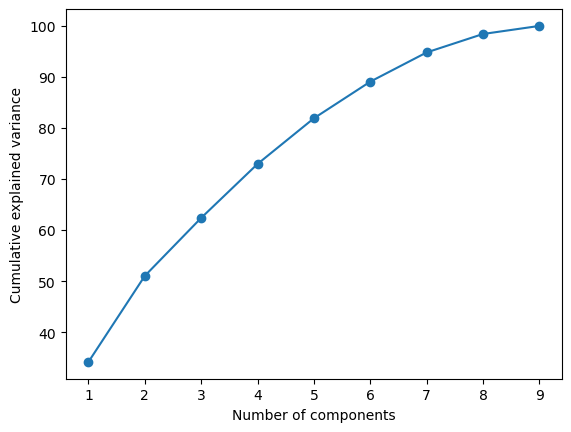

In [55]:
X_std = X.to_numpy()
e_val, e_vec = sorted_eigens(X_std)
display_explained_var(e_val,e_vec)

### Principal Component Analysis
#### Also displays the data points belonging to different moods being projected onto the 2 principal components

In [56]:
def PCA(X, n_comp, y):
    X = X.to_numpy()
    X_std = X
    e_val, e_vec = sorted_eigens(X_std)
    # Select top k eigenvectors
    k = n_comp
    W = e_vec[:k, :] # Projection matrix
    # display_explained_var(e_val,e_vec)
    X_proj = X_std.dot(W.T)
    
    # Plotting PCA components
    plt.figure(figsize=(8, 6))
    unique_classes = list(set(y))
    colors = plt.cm.tab10.colors[:len(unique_classes)] # Choose colors from a predefined colormap
    for i, class_label in enumerate(unique_classes):
        class_indices = (y == class_label)
        plt.scatter(X_proj[class_indices, 0], X_proj[class_indices, 1], c=colors[i], label=class_label)

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA')
    plt.legend()
    plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_22416\2581633066.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_proj[class_indices, 0], X_proj[class_indices, 1], c=colors[i], label=class_label)


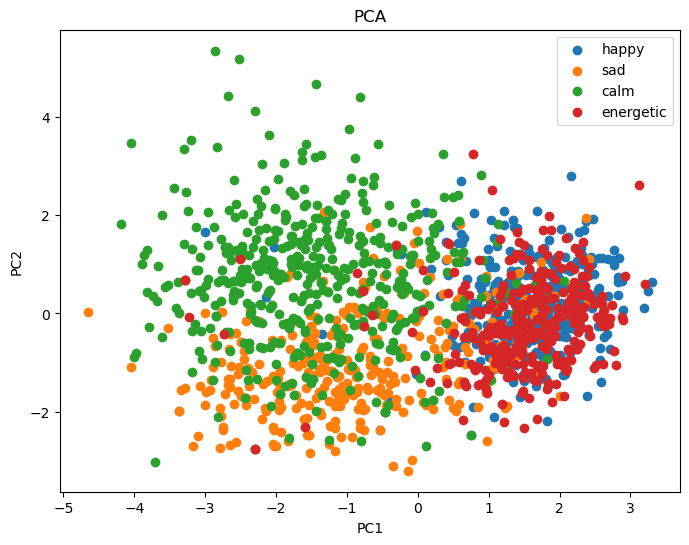

In [57]:
PCA(X, 2, y)

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def PCA_3D(X, n_comp, y):
    X = X.to_numpy()
    X_std = X
    e_val, e_vec = sorted_eigens(X_std)
    # Select top k eigenvectors
    k = n_comp
    W = e_vec[:k, :] # Projection matrix
    # display_explained_var(e_val,e_vec)
    X_proj = X_std.dot(W.T)
    
    # Plotting PCA components
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    unique_classes = list(set(y))
    colors = plt.cm.tab10.colors[:len(unique_classes)] # Choose colors from a predefined colormap
    for i, class_label in enumerate(unique_classes):
        class_indices = (y == class_label)
        ax.scatter(X_proj[class_indices, 0], X_proj[class_indices, 1], X_proj[class_indices, 2], c=colors[i], label=class_label)

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('PCA in 3D')
    ax.legend()
    plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_22416\3578033230.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X_proj[class_indices, 0], X_proj[class_indices, 1], X_proj[class_indices, 2], c=colors[i], label=class_label)


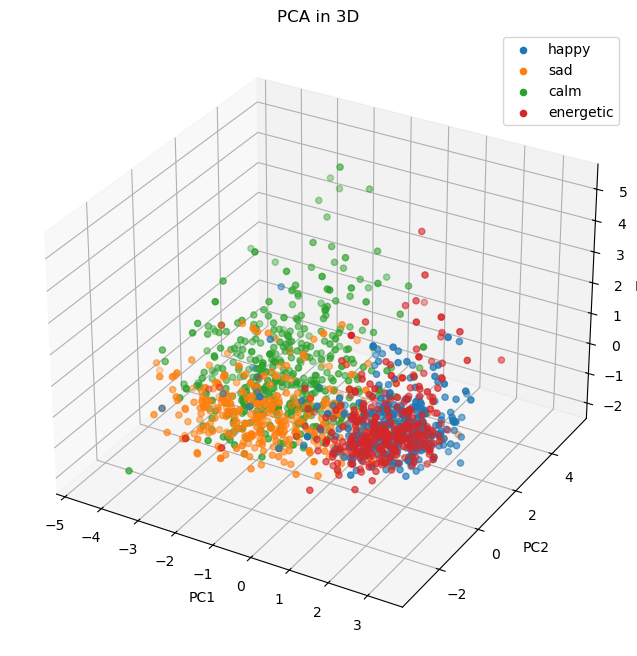

In [59]:
PCA_3D(X,3,y)

#### This shows that the moods 1 and 3 (that are happy and energetic) are almost similar on the first 3 principal components